# Synposis

The aim of this exercise is to determine what benchmarks and their associated averages  that can be established from the dataset that would be useful to a potential HDB buyer for evaulateing the cost/value proposition of a flat in a given town. 

For reasons detailed further in this Notebook, these benchmark metrics were applied to 3/4/5 room flats across 6 towns with the highest transactional value where these flats were grouped under within the dataset. 

Drilling down further - the exercise decided on narrow down on the benchmark metrics for 4 room flats within these 6 towns as part of a hypothetical scenario for a homebuyer wishing to compare the value/cost proposition in these 6 towns.

<b>Dataset Used:</b>
- HDB Resale Data from January 2017 to June 2020 (Adapted from [data.gov.sg](https://data.gov.sg/dataset/resale-flat-prices))

<b>Modules Used:</b>
- pandas
- numpy
- matplotlib
- csv

<b> Introduction - The HDB's Buyer Headache </b>
---
Hi there, I will be diving into the HDB Resale Dataset (Jan 2017-2020) available to the public through HDB-Data.gov.sg 

Homeownership is a milestone that almost everyone in Singapore will have to go through. Given that the most viable route to home ownership in Singapore is getting your own HDB is through BTO or Resale, I would wager that this would be a matter of importance to all. But to someone who is not in the secondary real estate market, where can one start get objective data to find out what is the average price for a flat in a certain area? 

We are fortunate enough to live in a time where data tools such as Python are available to make research easier compared to the days of old for the code-literate members of the public to use various tools to visualize and answer questions with the data sets provided. We are eqaully fortunate that the Singapore Govt has released its HDB resale dataset to the public, thereby allowing such analysis take place. The following is a exercise of my middling Python skills and a showcase of what is possible if one is willing to get their hands dirty. 

We begin by setting up the foundation for our analysis, loading our modules, importing and cleaning our data set. 

<b>The code can be toggled on and off for ease of reading by clicking the tabe in the next line.</b>



In [1]:
from IPython.display import HTML
#Loading
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

hdb_resale_listings = []

with open('data/HDB_Resale_With_Geocoordinates.csv', newline='', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        hdb_resale_listings.append(row)

    # Remove header
    hdb_resale_listings_headers = hdb_resale_listings[0]
    hdb_resale_listings = hdb_resale_listings[1:]    

# Iterate through nested list of HDB resale data
for row in hdb_resale_listings:
    
    # Extract data from specific columns and store into variables for easy access
    floor_area_sqm = row[6]
    lease_remaining = row[9]                 
    resale_price = row[10]
    longitude = row[12]
    latitude = row[13]
    
    row[6] = float(floor_area_sqm)
    
    # If lease_remaining info is of string data type
    if isinstance(lease_remaining,str):
        row[9] = int(lease_remaining[:2]) # Get years of lease remaining with slicing, and convert it to int type
   
    row[10] = float(resale_price)
    
    if longitude == '':
        row[12] = 0
    else:
        row[12] = float(longitude)
        
    if latitude == '':
        row[13] = 0
    else:
        row[13] = float(latitude)
      
hdb_resale_df = pd.DataFrame(hdb_resale_listings, columns = hdb_resale_listings_headers)

hdb_resale_df.head()

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="This documment is written in a Jupyter notebook and the code used to produce these analyses has been hidden for ease of reading.  
To make the code visiable click here"></form>''')


So far so good. Lets create a subset of this dataset with useful quantitative data - such as town, flat_type, resale_price, remaining_lease for starters: 

In [2]:
flat_count = hdb_resale_df.groupby(['town','flat_type'])['remaining_lease'].count()
flat_stats = hdb_resale_df.groupby(['town','flat_type'])[['resale_price','remaining_lease','floor_area_sqm']].mean()

# DF Generation for later use

flat_stats = pd.merge(flat_stats,flat_count,left_index=True,right_index=True)
flat_stats.columns = ['avg_resale_price','avg_remaining_lease','floor_area_sqm','total_sold']

total_sold = flat_stats.groupby(['town'])['total_sold'].sum()
total_sold.sort_values(ascending=False,inplace=True)
total_sold_x = list(total_sold.index) 
total_sold_values  = total_sold.to_numpy()

total_value = hdb_resale_df.groupby(['town'])['resale_price'].sum()
total_value.sort_values(ascending=False,inplace=True)
total_value_x = list(total_value.index) 
#Reduce value to SGD million
total_value_values = total_value.to_numpy() 
for x in range(0,len(total_value_values )):
    total_value_values[x] = total_value_values[x]/1000000

avg_price = hdb_resale_df.groupby(['town'])['resale_price'].mean()
avg_price.sort_values(ascending=False,inplace=True)
avg_price_x = list(avg_price.index) 
avg_price_values  = avg_price.to_numpy()

flat_type = hdb_resale_df.groupby('flat_type')['resale_price'].count()
flat_type_x = list(flat_type.index)
flat_type_values = flat_type.to_numpy()

flat_type

flat_type
1 ROOM                 35
2 ROOM               1099
3 ROOM              17757
4 ROOM              30431
5 ROOM              18150
EXECUTIVE            5815
MULTI-GENERATION       33
Name: resale_price, dtype: int64

Using the above, we can now generate a few charts to visualize a basic summary on our data as follows

<b>Charts:</b>
- Number of Flat Transactions by Town
- Total Value of Transactions (SGD Million)
- Average Price of Flats by Town
- Flat Types across Towns

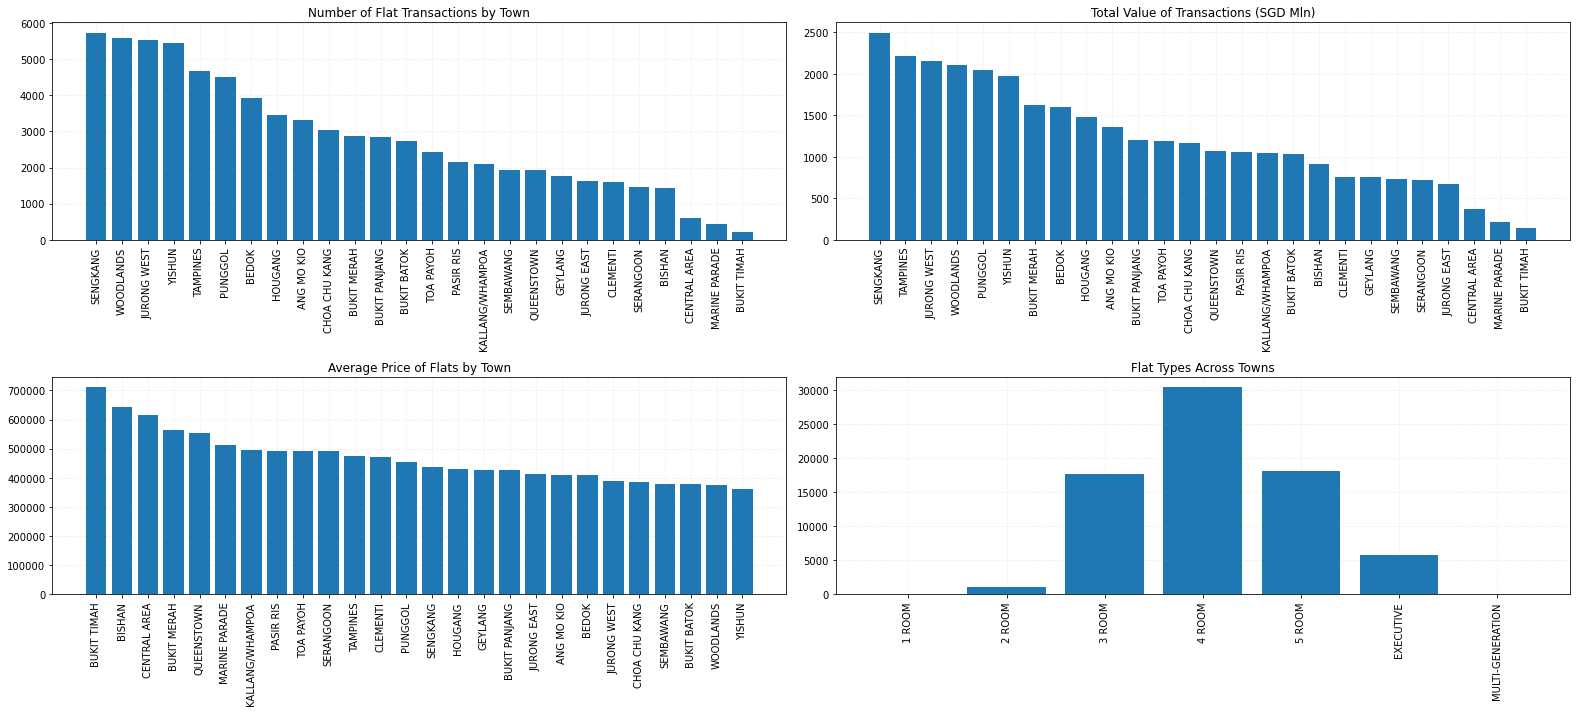

In [3]:
fig,[[ax,ax1],[ax2,ax3]] = plt.subplots(nrows=2,ncols=2,figsize = (22,10))

ax.bar(total_sold_x,total_sold_values)
ax.set_xticklabels(total_sold_x, rotation = 90)
ax.set_title('Number of Flat Transactions by Town')

ax1.bar(total_value_x,total_value_values)
ax1.set_xticklabels(total_value_x, rotation = 90)
ax1.set_title('Total Value of Transactions (SGD Mln)')

ax2.bar(avg_price_x,avg_price_values)
ax2.set_xticklabels(avg_price_x, rotation = 90)
ax2.set_title('Average Price of Flats by Town')

ax3.bar(flat_type_x,flat_type_values)
ax3.set_xticklabels(flat_type_x, rotation = 90)
ax3.set_title('Flat Types Across Towns')


ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)
ax1.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)
ax2.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)
ax3.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

fig.tight_layout()

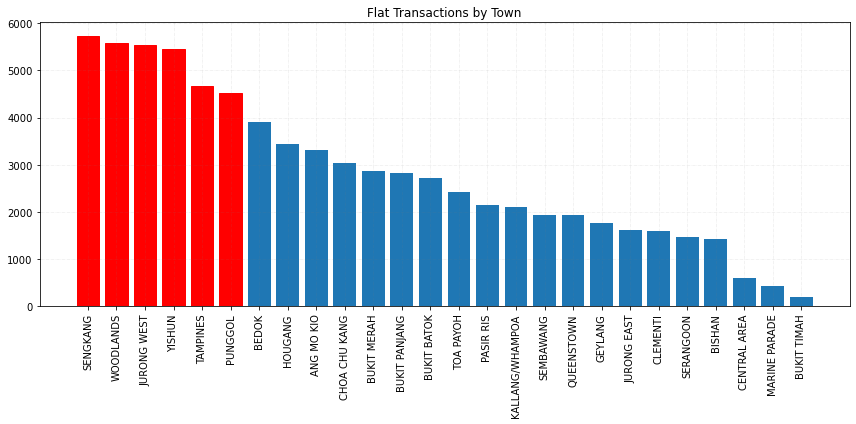

In [4]:
fig, ax, = plt.subplots(figsize = (12,6))

ax.bar(total_sold_x,total_sold_values)
ax.set_xticklabels(total_sold_x, rotation = 90)
ax.set_title('Flat Transactions by Town')
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

for i in range(0,6):
    ax.get_children()[i].set_color('r') 

fig.tight_layout()
fig.show()

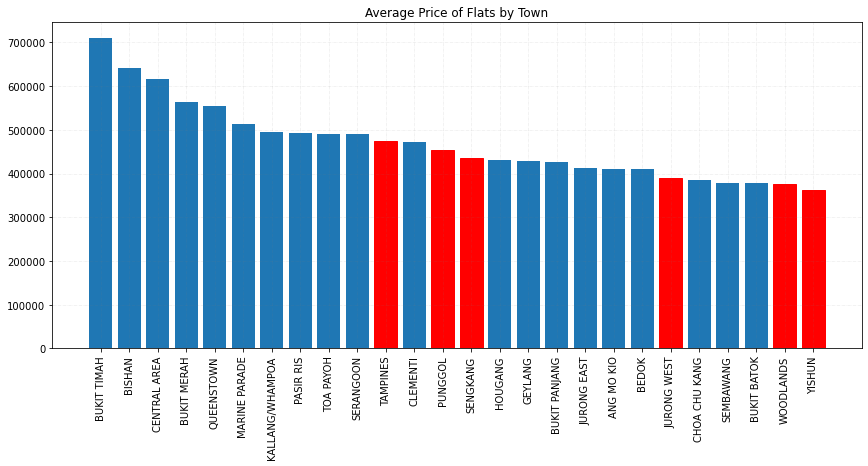

In [5]:
fig, ax2, = plt.subplots(figsize = (14.5,6))

ax2.bar(avg_price_x,avg_price_values)
ax2.set_xticklabels(avg_price_x, rotation = 90)
ax2.set_title('Average Price of Flats by Town')
ax2.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

a = [10,12,13,20,24,25]
for i in range(len(a)):
    ax2.get_children()[a[i]].set_color('r')
fig.show()

Taking 2 charts that we generated, namely: Flat Transacations by Town and Average Price of Flats by Town, we get a high level view of both the activity and relative value of each town.

<b>Top 6 Towns by Transactions</b>
1. Sengkang
2. Woodlands
3. Jurong West
4. Yishun
5. Tampines
6. Punggol

Surprisingly or not, Sengkang takes the crown in both categories with the rest of the placings overlapping with each other. Despite Punggol's reputation as a not too stellar location, the data indicate there are a lot buyers taking the other side.  

<b>Top 6 Towns by Total Value of Transactions</b>
1. Sengkang  
2. Tampines   
3. Jurong West 
4. Woodlands
5. Punggol
6. Yishun 

Tampines takes the second place in terms of total value of transactions which is aided by having the highest average price among our 6 towns

<b>By Average Price (SGD)</b> 
1. Tampines - 473,430
2. Punggol - 453,275
3. Sengkang - 435,547
4. Jurong West - 388,923
5. Woodlands - 377,001
6. Yishun - 362,940

The divide between the top half and bottom half is evident with a 50K gap between Seng Kang and Jurong West - with buyers implied to favour locations either in the East or relatively new BTO locations.  


<b>High Prices, Low Volume</b>

On the other side of the spectrum, despite topping the average price chart, Bukit Timah has the least in transactions done, both in amount and value. In fact, the top 5 in average prices with the sole exception of Queenstown has a similar profile, following from the last place in these 2 categories. Queenstown apparently has qualities that people would be willing to pay a premium for. All in all, nothing surprising.   



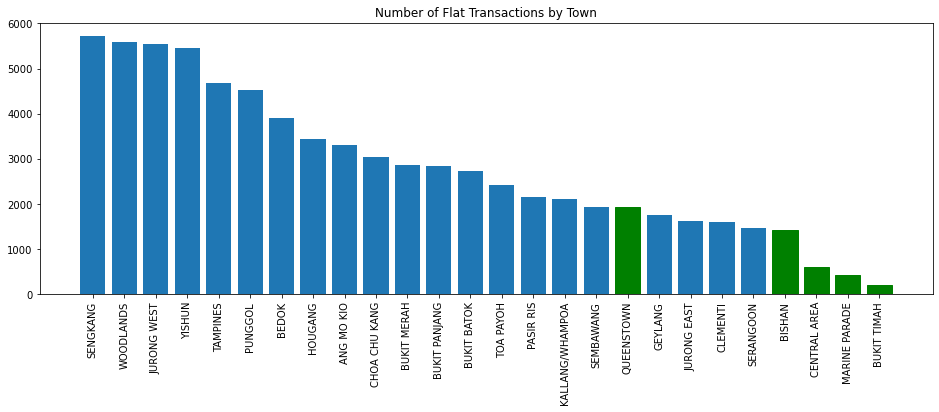

In [6]:
fig, ax = plt.subplots(figsize = (16,5))
ax.bar(total_sold_x,total_sold_values)
ax.set_xticklabels(total_sold_x, rotation = 90)
ax.set_title('Number of Flat Transactions by Town')

a = [17,22,23,24,25]
for i in range(len(a)):
    ax.get_children()[a[i]].set_color('g') 

fig.show()

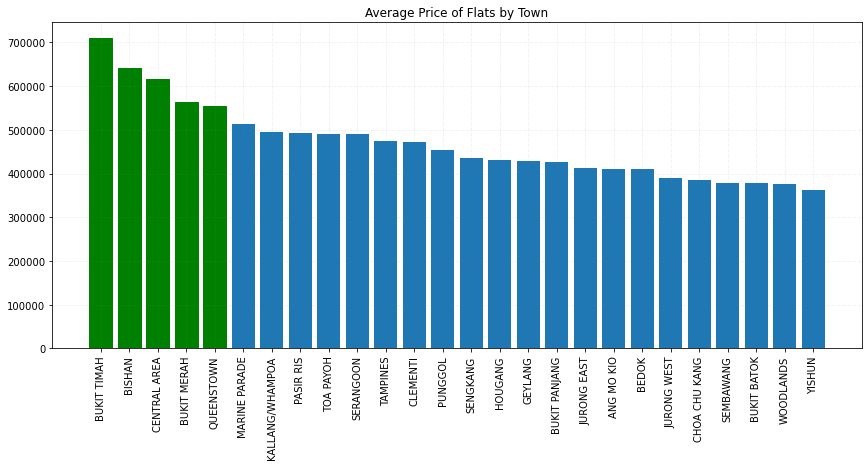

In [7]:
fig, ax2, = plt.subplots(figsize = (14.5,6))

ax2.bar(avg_price_x,avg_price_values)
ax2.set_xticklabels(avg_price_x, rotation = 90)
ax2.set_title('Average Price of Flats by Town')
ax2.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)

a = [0,1,2,3,4]
for i in range(len(a)):
    ax2.get_children()[a[i]].set_color('g')
fig.show()

# Flat Type Distribution and our Metrics for Benchmarking
4-Room flats dominate the with 3-Rooms and 5-Rooms taking a equal share. Knowing this, we can narrow our focus on to these flat types according to 3 characteristics found in our dataset that most homebuyers are interested in to form our benchmark metrics for comparison: <b>Price, Lease Remaining and Floor Area SQM</b>. 

Qualitative factors such as location and nearby amentities may and will impact the measure of these metrics for certain data points and it is out of this exercise's purview to account for these.   

Text(0.5, 1.0, 'Flat Types Across Towns')

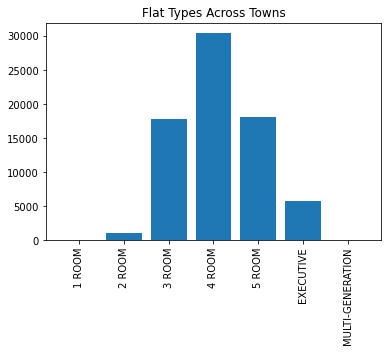

In [8]:
fig, ax = plt.subplots()
ax.bar(flat_type_x,flat_type_values)
ax.set_xticklabels(flat_type_x, rotation = 90)
ax.set_title('Flat Types Across Towns')

# Digging deeper 
<b> 3/4/5 room flats across the top 6 towns in transaction value</b> 

Let's take a look at theses metrics for the most common flat types across the top 6 towns via a boxplot to see the averages and the distribution of these statistics. But before that, we need to do some prep to showcase our data: 



In [9]:
#Main DF definition
town_list = []
town_list = ['SENGKANG','WOODLANDS','JURONG WEST','YISHUN','TAMPINES','PUNGGOL']

def boxplot_source_refresh():
    sk = hdb_resale_df[(hdb_resale_df['town']== 'SENGKANG')] 
    tp = hdb_resale_df[(hdb_resale_df['town']== 'TAMPINES')] 
    pg = hdb_resale_df[(hdb_resale_df['town']== 'PUNGGOL')] 
    jw = hdb_resale_df[(hdb_resale_df['town']== 'JURONG WEST')] 
    yh = hdb_resale_df[(hdb_resale_df['town']== 'YISHUN')] 
    wl = hdb_resale_df[(hdb_resale_df['town']== 'WOODLANDS')] 
    
    town_df = [sk,wl,jw,yh,tp,pg]
    
    for df in town_df:    
        col_dump = df[ ~(df['flat_type'] == '3 ROOM') & ~(df['flat_type'] == '4 ROOM') & ~(df['flat_type'] == '5 ROOM') ].index  
        df.drop(col_dump, inplace = True)
    
    return sk,tp,pg,jw,yh,wl


def boxplot_filter(room,column): 
    #using town-filtered dfs, generates filtered column series for use in boxplot 
    sk,tp,pg,jw,yh,wl = boxplot_source_refresh()
    
    sk = sk[(sk['flat_type']==room)][column].squeeze()
    tp = tp[(tp['flat_type']==room)][column].squeeze()
    pg = pg[(pg['flat_type']==room)][column].squeeze()
    jw = jw[(jw['flat_type']==room)][column].squeeze()
    yh = yh[(yh['flat_type']==room)][column].squeeze()
    wl = wl[(wl['flat_type']==room)][column].squeeze()

    df_values_list = [sk,wl,jw,yh,tp,pg]

    return df_values_list



# Generating the Boxplots
After completting the above data extraction, we can now proceed to generate out our boxplots to visualize the range of the price, floor area and lease remaining data we have for our selected area of focus

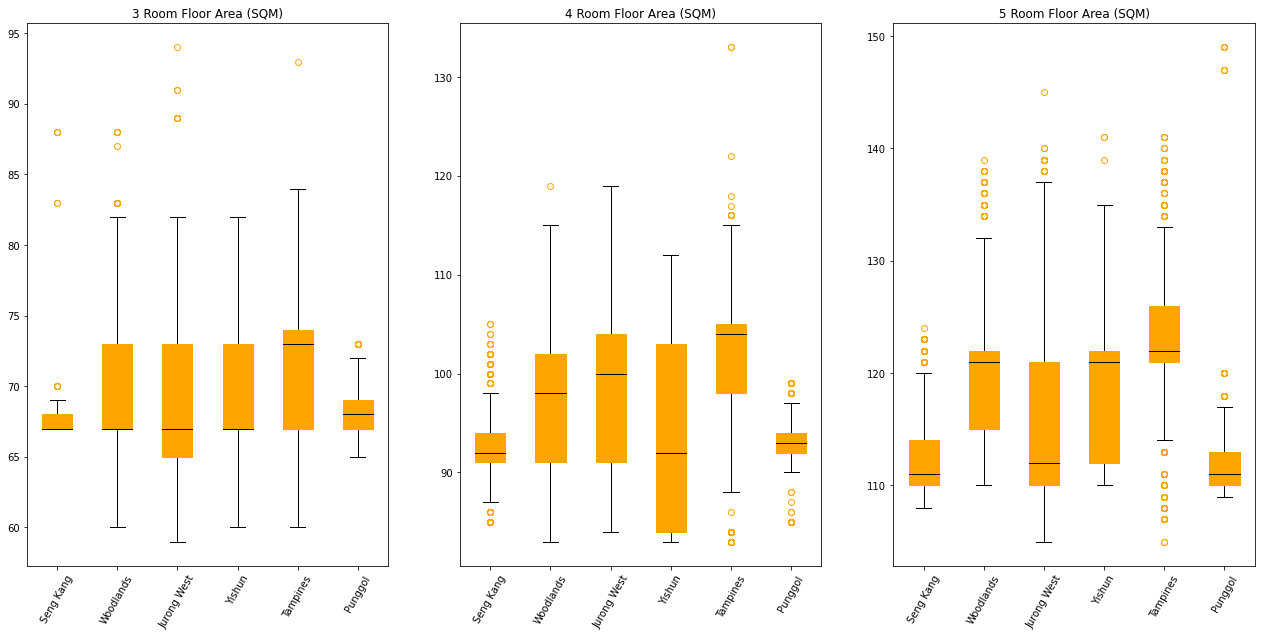

In [10]:
c = 'orange'
box_color_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor=c),
             'capprops': dict(color='black'),
             'flierprops': dict(color=c, markeredgecolor=c),
             'medianprops': dict(color='black'),
             'whiskerprops': dict(color='black')}

#4 Room - Floor Area
floor_area_4_room = boxplot_filter('4 ROOM','floor_area_sqm')
#3 Room - Floor Area
floor_area_3_room = boxplot_filter('3 ROOM','floor_area_sqm')
#5 Room - Floor Area
floor_area_5_room = boxplot_filter('5 ROOM','floor_area_sqm')

fig,[ax,ax1,ax2] = plt.subplots(nrows=1,ncols=3,figsize = (22,10))

#3 room boxplot
ax.boxplot(floor_area_3_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax.set_title('3 Room Floor Area (SQM)')
ax.tick_params(axis="x", rotation=60)


#4 room boxplot
ax1.boxplot(floor_area_4_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax1.set_title('4 Room Floor Area (SQM)')
ax1.tick_params(axis="x", rotation=60)

#5 room boxplot
ax2.boxplot(floor_area_5_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax2.set_title('5 Room Floor Area (SQM)')
ax2.tick_params(axis="x", rotation=60)

fig.show()


# Floor Area
We can see some interesting findings for each of the 3 groups.

3 Room Flats: The averages, max and min are very close to each other with the sole exception for Tampines whose average is markedly higher. Sengkang and Punggol also have a smaller bar which implies a smaller population of transactions on this flat type, signalling either a lack of actual supply of units that were built or the unwillingness of owners of said flats to sell.  

For 4 room and 5 rooms, we see a somewhat equal min and max and though the averages seem to be different, they are within 10 square feet of each other. Sengkang and Punggol continue to have smaller than average bars, signalling the same implication in our 3 room grouping. 


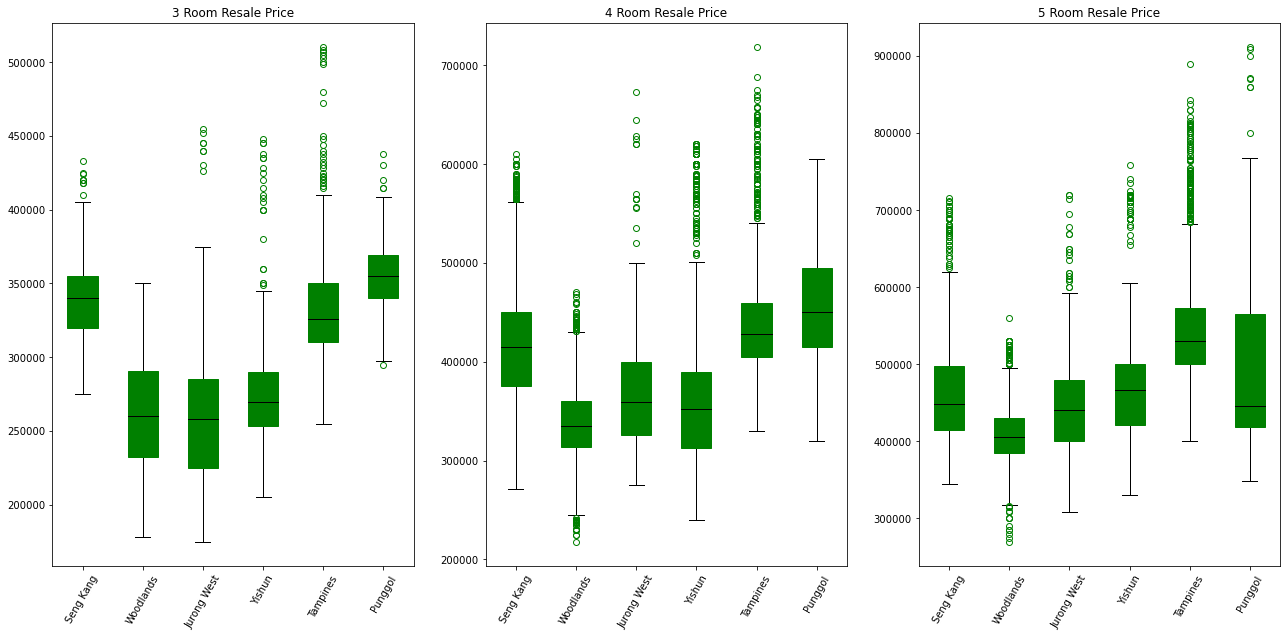

In [11]:
#4 Room - Prices
resale_4_room = boxplot_filter('4 ROOM','resale_price')
#3 Room - Prices
resale_3_room = boxplot_filter('3 ROOM','resale_price')
#5 Room - Prices
resale_5_room = boxplot_filter('5 ROOM','resale_price')

c = 'g'
box_color_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor=c),
             'capprops': dict(color='black'),
             'flierprops': dict(color=c, markeredgecolor=c),
             'medianprops': dict(color='black'),
             'whiskerprops': dict(color='black')}


#use figax since u already got all the source data
fig,[ax,ax1,ax2] = plt.subplots(nrows=1,ncols=3,figsize = (22,10))

#3 room boxplot
ax.boxplot(resale_3_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    

ax.set_title('3 Room Resale Price')
ax.tick_params(axis="x", rotation=60)

#4 room boxplot
ax1.boxplot(resale_4_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax1.set_title('4 Room Resale Price')
ax1.tick_params(axis="x", rotation=60)

#5 room boxplot
ax2.boxplot(resale_5_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax2.set_title('5 Room Resale Price')
ax2.tick_params(axis="x", rotation=60)

fig.show()

# Resale Price
Unlike the previous boxplot, we find ourselves with a lot of outliers in the price department with almost all trending higher from the average. Woodlands is the odd one out with outliers both on the top end and bottom, albeit compressed indicating that the area of compression is the true range of the min/max. 

Looking at the raw data, we find one possible reason for price outliers: 

<b>The 'Premium'/DBSS Premium</b>

Unsurprisingly the type of flat has a impact on pricing. For Tampines/Yishun, the price toppers were DBSS for 3/4/5 rooms. Interesting to note, that for 5 room resale - 9 of 10 spots are from Punggol (Premium). Sengkang's toppers are also premium. 

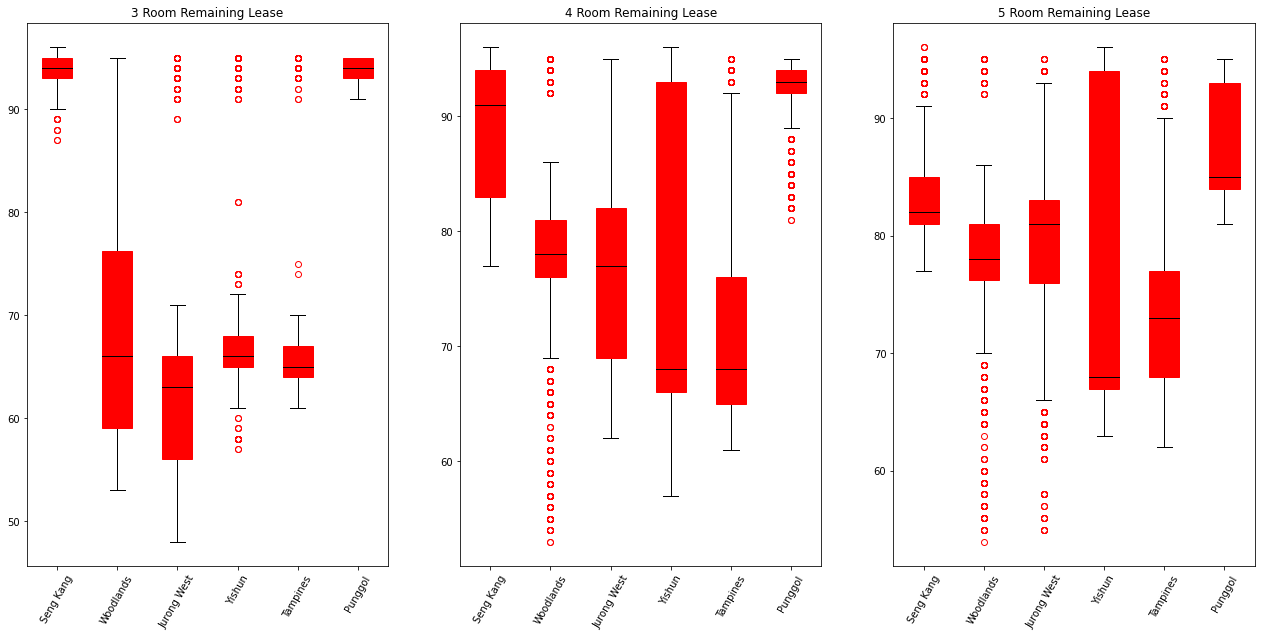

In [12]:
#4 Room - Lease Remaining
lease_4_room = boxplot_filter('4 ROOM','remaining_lease')
#3 Room - Lease Remaining
lease_3_room = boxplot_filter('3 ROOM','remaining_lease')
#5 Room - Lease Remaining
lease_5_room = boxplot_filter('5 ROOM','remaining_lease')

c = 'r'
box_color_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor=c),
             'capprops': dict(color='black'),
             'flierprops': dict(color=c, markeredgecolor=c),
             'medianprops': dict(color='black'),
             'whiskerprops': dict(color='black')}


#use figax since u already got all the source data
fig,[ax,ax1,ax2] = plt.subplots(nrows=1,ncols=3,figsize = (22,10))

#3 room boxplot
ax.boxplot(lease_3_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax.set_title('3 Room Remaining Lease')
ax.tick_params(axis="x", rotation=60)

#4 room boxplot
ax1.boxplot(lease_4_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax1.set_title('4 Room Remaining Lease')
ax1.tick_params(axis="x", rotation=60)

#5 room boxplot
ax2.boxplot(lease_5_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],**box_color_dict)    
ax2.set_title('5 Room Remaining Lease')
ax2.tick_params(axis="x", rotation=60)

# Lease Remaining
Last but not least, is the Lease Remaining for these resale flats. A key thing to note is that higher averages implies a relatively new development which in turn means a longer time before the HDB lease expires. 

Punggol and Sengkang has smaller compressed bars. Being new towns, their lease remaining is very high compared to the rest. 

Tampines has a wide range and small distance between the 1st and 3rd quartiles meaning that there are lower leases remaining in general. 

# Putting it all together 

Gathering and visualizing the data is one part of the challenge and having a question to answer using the data is another. The pitfalls and joys of data analytics is that you can dive as deep and as wide as you want and still find ways to ask more questions on the data.

Being a someone who lives in the east of Singapore, I would like to preferably still stay in the East. Thus I would like to use Tampines as my focal point for this exercise given the number of transactions. My desired flat type would be a 4 Room Flat. Using the data we already set up, we generate the box plot for these characteristics for 4 room flats.


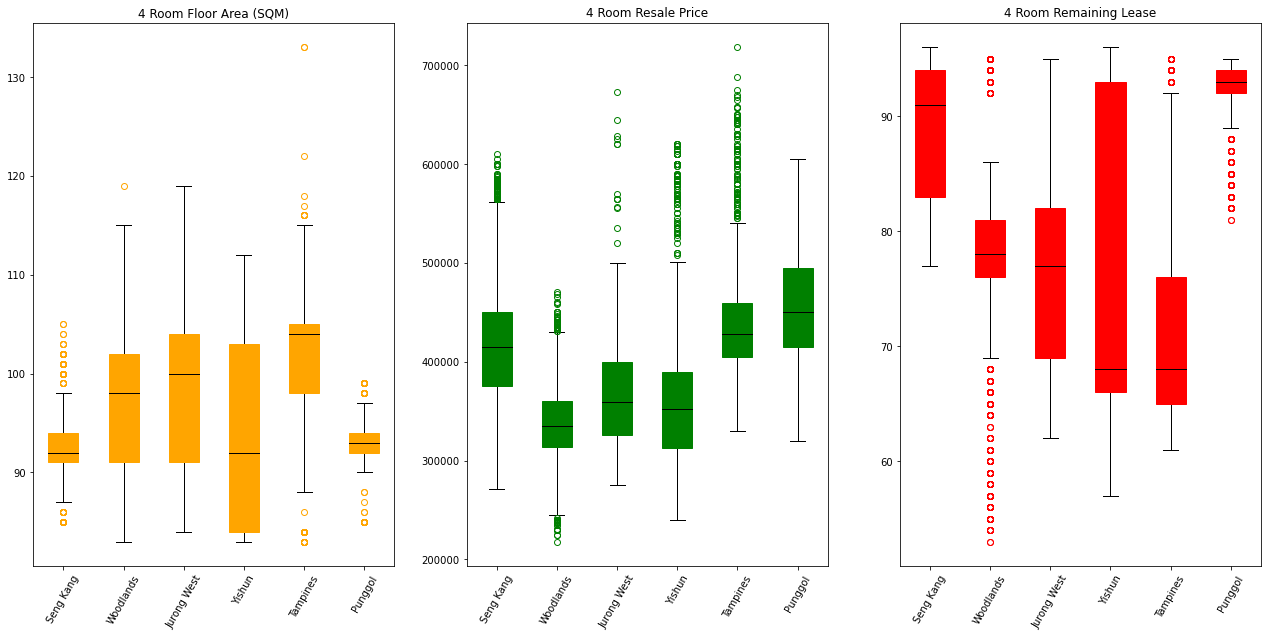

In [13]:
#use figax since u already got all the source data

fig,[ax,ax1,ax2] = plt.subplots(nrows=1,ncols=3,figsize = (22,10))

#Floor Area boxplot
ax.boxplot(floor_area_4_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],patch_artist = True, 
            boxprops=dict(color='orange', facecolor='orange'),flierprops=dict(color='orange', markeredgecolor='orange'),
           medianprops=dict(color='black'))    
ax.set_title('4 Room Floor Area (SQM)')
ax.tick_params(axis="x", rotation=60)

#Price boxplot
ax1.boxplot(resale_4_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],patch_artist = True, 
            boxprops=dict(color='g', facecolor='g'),flierprops=dict(color='g', markeredgecolor='g'),
            medianprops=dict(color='black')  )    
ax1.set_title('4 Room Resale Price')
ax1.tick_params(axis="x", rotation=60)

#Remaining lease boxplot
ax2.boxplot(lease_4_room,labels =['Seng Kang', 'Woodlands', 'Jurong West', 'Yishun','Tampines','Punggol'],
            patch_artist = True,boxprops= dict(color='r', facecolor='r'),flierprops= dict(color='r', markeredgecolor='r'),
            medianprops=dict(color='black'))    
ax2.set_title('4 Room Remaining Lease')
ax2.tick_params(axis="x", rotation=60)

Looking at it as a whole, floor area is on the higher end with more than 100 SQM for 4 rooms, with median prices slighty above average in the low 400K SGD range. The only concern would be the rather low leases remaining below 70 years, which may make it difficult to find a decently priced flat with high amount of both floor area and lease. Armed with the above benchmarks, I would have a better gauge to understand if a particular flat on offer is a deal or not for a given price point.

If I was interested in just the raw (but summarized) data for the rest the towns, making use of the groupby feature is a good preliminary way to kick start the visualization process - which coincidentally was already used to prepare our data to be visualized earlier. All numbers are the mean of the characteristics chosen where applicable.  



In [14]:
flat_stats.loc[slice(None),'4 ROOM',:]

,avg_resale_price,avg_remaining_lease,floor_area_sqm,total_sold
town,,,,
ANG MO KIO,473385.618778,67.266968,92.867647,884
BEDOK,433515.568164,66.431048,93.152088,1269
BISHAN,561334.875179,70.770445,97.849354,697
BUKIT BATOK,377761.378304,70.703737,96.855059,1097
BUKIT MERAH,651130.831948,79.285319,93.152355,1083
BUKIT PANJANG,388423.743590,81.404040,95.675214,1287
BUKIT TIMAH,634886.363636,64.428571,99.493506,77
CENTRAL AREA,740156.149798,78.360324,91.222672,247
CHOA CHU KANG,345112.256428,77.127172,101.355803,1439


# Concluding thoughts
The data is not so cleanly formated, but as a off the cuff query, it works. The questions one can ask and the multitude of answers that can be derived from this dataset, let alone others, is staggering, given that I was only looking at just 3 points of interest. For example, if you wish to see the price trend for 5 room flats across a yearly time period, one can do so. If you have the right questions and the know how to get them, it goes without saying that a lot of insight can be gained for a fraction of the time spent. 

The best part of it is all of this is repeatable! 

And thus concludes my exploration of this dataset. If you are interested in our housing data or have a very specific HDB resale question to answer, this is definitely a rich dataset to be explore.




